<a href="https://colab.research.google.com/github/omerfarukyuce/Nutrition-Facts-EDA-And-Calori-Prediction/blob/main/Nutrition_Facts_EDA_And_Calori_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import And Install Necessary Libraries**

In [12]:
# !pip install lightgbm
# !pip install catboost

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# **Load the Dataset**

In [14]:
df = pd.read_csv('starbucks.csv')

In [15]:
df

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...,...
72,73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


# **Understand And Organize the Dataset**

In [16]:
df = df.drop('Unnamed: 0', axis=1)

In [17]:
df

,item,calories,fat,carb,fiber,protein,type
0,8-Grain Roll,350,8.0,67,5,10,bakery
1,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,Apple Fritter,420,20.0,59,0,5,bakery
3,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...,...
72,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.3+ KB


In [19]:
df.isnull().sum()

,0
item,0
calories,0
fat,0
carb,0
fiber,0
protein,0
type,0


In [20]:
df['type'].unique()

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [21]:
df.groupby('type').count()

,item,calories,fat,carb,fiber,protein
type,,,,,,
bakery,41,41,41,41,41,41
bistro box,8,8,8,8,8,8
hot breakfast,8,8,8,8,8,8
parfait,3,3,3,3,3,3
petite,9,9,9,9,9,9
salad,1,1,1,1,1,1
sandwich,7,7,7,7,7,7


In [22]:
df.groupby('type')['item'].count()

,item
type,
bakery,41
bistro box,8
hot breakfast,8
parfait,3
petite,9
salad,1
sandwich,7


## **Visualization of How Many Items Are of Which Type**

<ipython-input-23-72c4607bfa96>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='item', data=type_counts, palette='rocket');


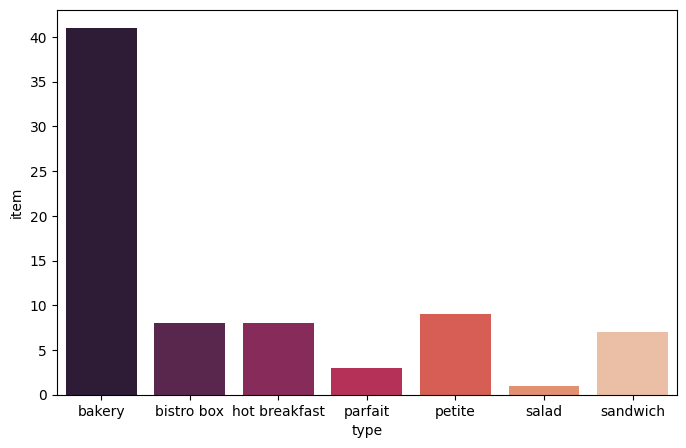

In [23]:
type_counts = df.groupby('type')['item'].count().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='type', y='item', data=type_counts, palette='rocket');

## **Visualization of the Average Calories Value of Each Type Group**

<ipython-input-24-2b1081484634>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='calories', data=df, palette='rocket');


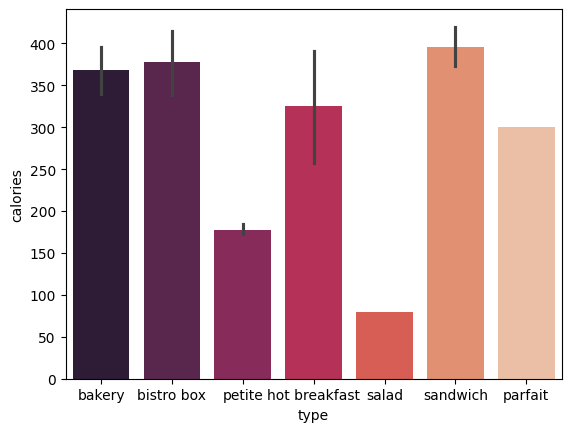

In [24]:
sns.barplot(x='type', y='calories', data=df, palette='rocket');

## **Histograms of Numerical Variables**

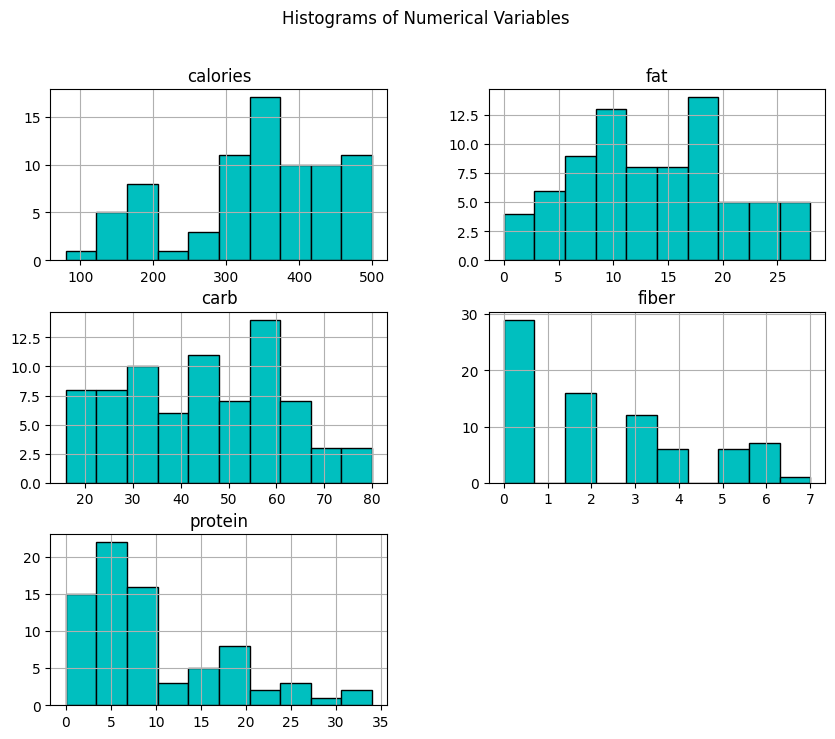

In [25]:
df.hist(figsize=(10, 8), bins=10, color='c', edgecolor='k')
plt.suptitle("Histograms of Numerical Variables")
plt.show()

## **Visualization of Fat and Protein Distribution**

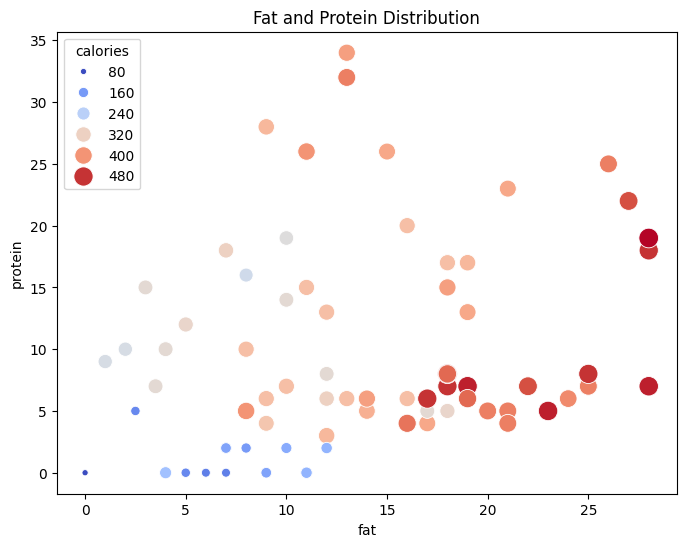

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="fat", y="protein", hue="calories", size="calories", data=df, palette="coolwarm", sizes=(20, 200))
plt.title("Fat and Protein Distribution")
plt.show()

## **Visualization Average Nutritional Values ​​by Food Types**

<Figure size 1200x600 with 0 Axes>

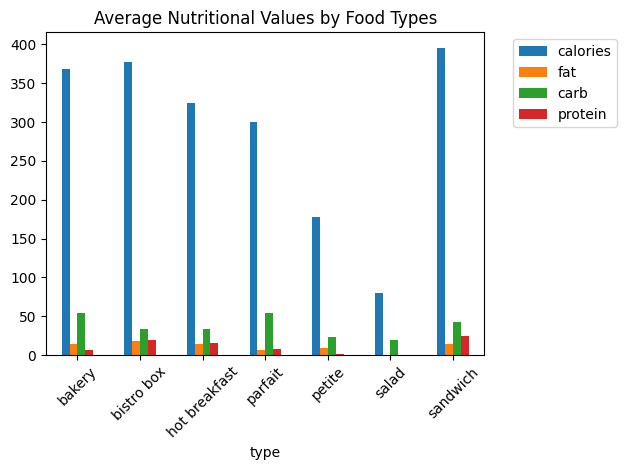

In [27]:
plt.figure(figsize=(12,6))
df.groupby('type')[['calories', 'fat', 'carb', 'protein']].mean().plot(kind='bar')
plt.title('Average Nutritional Values ​​by Food Types')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## **Visualization of Relationships Between Pairs of Variables in Dataset**

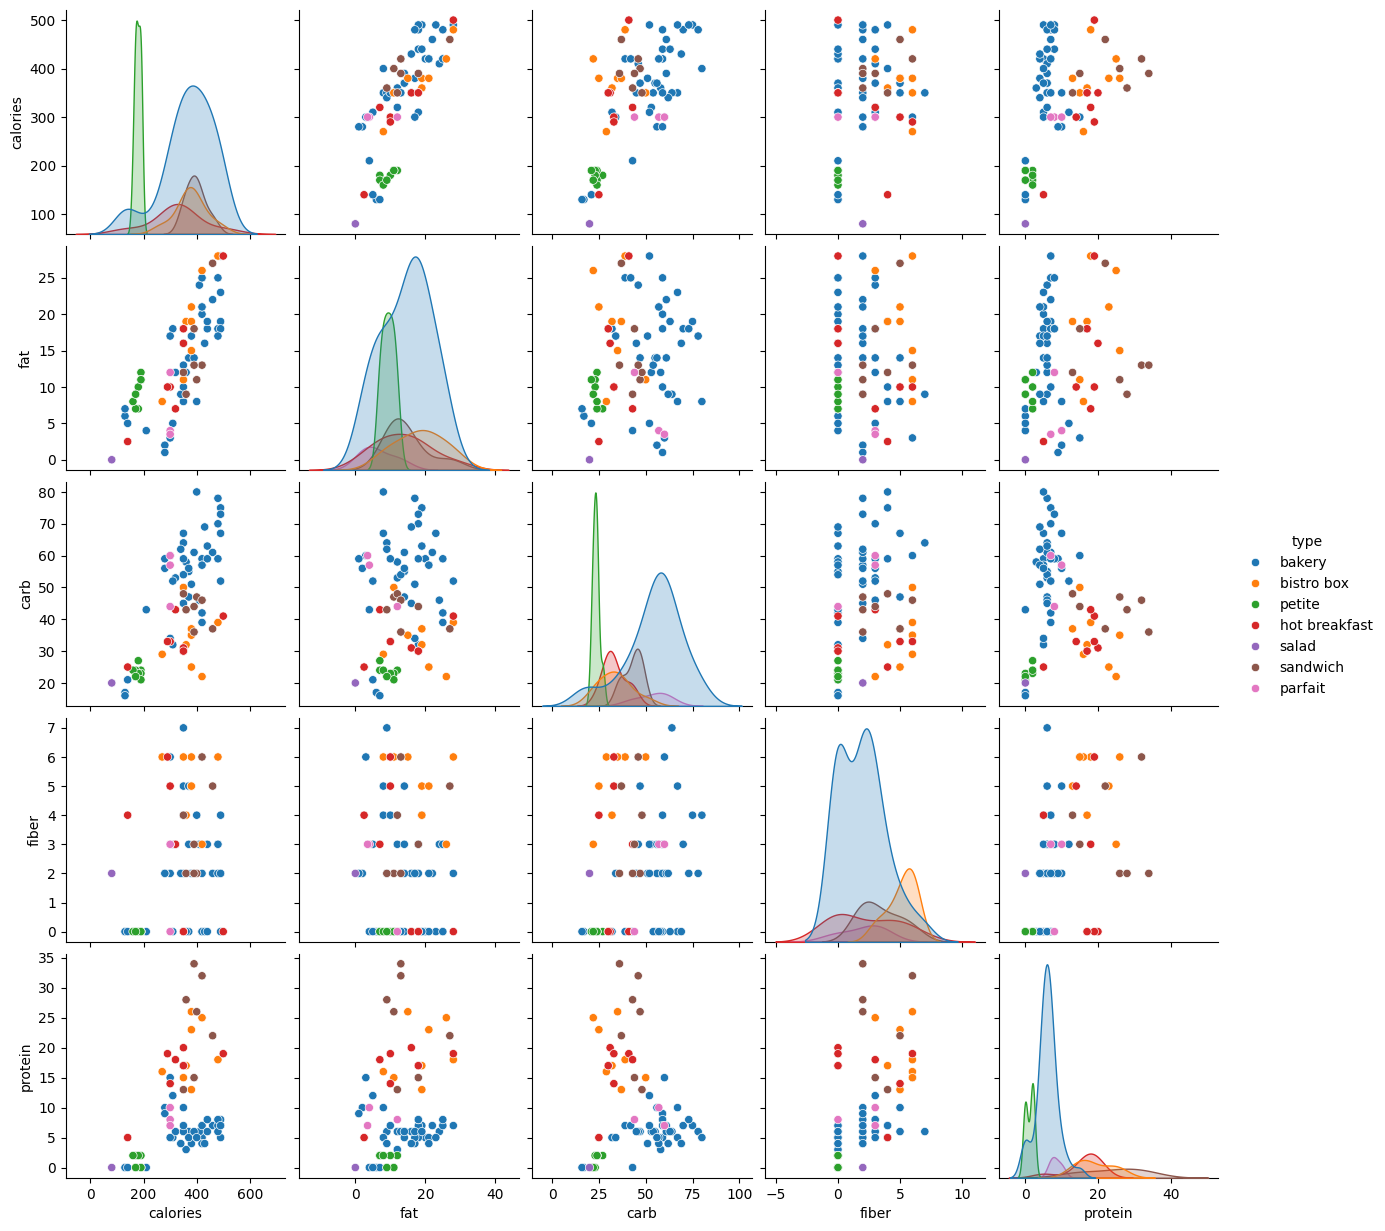

In [28]:
sns.pairplot(df, hue='type');

## **Dummying the 'type' Variable, Which is a Categorical Variable**

In [29]:
df = pd.get_dummies(df,columns=['type'], drop_first=True)

In [30]:
df.head()

,item,calories,fat,carb,fiber,protein,type_bistro box,type_hot breakfast,type_parfait,type_petite,type_salad,type_sandwich
0,8-Grain Roll,350,8.0,67,5,10,False,False,False,False,False,False
1,Apple Bran Muffin,350,9.0,64,7,6,False,False,False,False,False,False
2,Apple Fritter,420,20.0,59,0,5,False,False,False,False,False,False
3,Banana Nut Loaf,490,19.0,75,4,7,False,False,False,False,False,False
4,Birthday Cake Mini Doughnut,130,6.0,17,0,0,False,False,False,False,False,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item                77 non-null     object 
 1   calories            77 non-null     int64  
 2   fat                 77 non-null     float64
 3   carb                77 non-null     int64  
 4   fiber               77 non-null     int64  
 5   protein             77 non-null     int64  
 6   type_bistro box     77 non-null     bool   
 7   type_hot breakfast  77 non-null     bool   
 8   type_parfait        77 non-null     bool   
 9   type_petite         77 non-null     bool   
 10  type_salad          77 non-null     bool   
 11  type_sandwich       77 non-null     bool   
dtypes: bool(6), float64(1), int64(4), object(1)
memory usage: 4.2+ KB


In [32]:
df.describe()

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


In [33]:
df = df.drop('item', axis=1)

In [34]:
df.shape

(77, 11)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   calories            77 non-null     int64  
 1   fat                 77 non-null     float64
 2   carb                77 non-null     int64  
 3   fiber               77 non-null     int64  
 4   protein             77 non-null     int64  
 5   type_bistro box     77 non-null     bool   
 6   type_hot breakfast  77 non-null     bool   
 7   type_parfait        77 non-null     bool   
 8   type_petite         77 non-null     bool   
 9   type_salad          77 non-null     bool   
 10  type_sandwich       77 non-null     bool   
dtypes: bool(6), float64(1), int64(4)
memory usage: 3.6 KB


In [36]:
df

,calories,fat,carb,fiber,protein,type_bistro box,type_hot breakfast,type_parfait,type_petite,type_salad,type_sandwich
0,350,8.0,67,5,10,False,False,False,False,False,False
1,350,9.0,64,7,6,False,False,False,False,False,False
2,420,20.0,59,0,5,False,False,False,False,False,False
3,490,19.0,75,4,7,False,False,False,False,False,False
4,130,6.0,17,0,0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
72,420,13.0,46,6,32,False,False,False,False,False,True
73,390,13.0,36,2,34,False,False,False,False,False,True
74,300,12.0,44,0,8,False,False,True,False,False,False
75,300,4.0,57,3,10,False,False,True,False,False,False


# **Models Building**

In [37]:
x = df.drop('calories',axis=1)
y = df[['calories']]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42)

In [39]:
x_test.shape

(16, 10)

# **Random Forest Regressor Model**

In [40]:
rf = RandomForestRegressor(n_estimators=600, random_state=42)
model_rf = rf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [41]:
model_rf.score(x_test, y_test)

0.9328518833259388

In [42]:
y_pred = model_rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1024.7432118055556
R² Score: 0.9328518833259388


## **Linear Regression Model**

In [43]:
lr = LinearRegression()
model_lr = lr.fit(x_train, y_train)

linear Model

In [44]:
model_lr.score(x_test, y_test)

0.9930687931839743

In [45]:
y_pred = model_lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 105.77671401894082
R² Score: 0.9930687931839743


## **GBM (Gradient Boosting Regressor) Model**

In [46]:
gbm = GradientBoostingRegressor(random_state=42, learning_rate=0.5, max_depth=4, n_estimators=400, subsample=0.5)

In [47]:
model_gbm = gbm.fit(x_train, y_train)
model_gbm.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


0.9738130503937129

## **K Neighbors Regressor Model**

In [48]:
knn = KNeighborsRegressor(n_neighbors=1)
model_knn = knn.fit(x_train, y_train)
model_knn.score(x_test, y_test)

0.9561789700010238

In [49]:
y_pred = model_knn.predict(x_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 668.75
R² Score: 0.9561789700010238


## **SVR (Support Vector Regression) Model**

In [51]:
svr = SVR(kernel="linear", C=6)
svr_model = svr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
svr_model.score(x_test, y_test)

0.9943433686184033

In [53]:
y_pred = svr_model.predict(x_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 86.32549797508611
R² Score: 0.9943433686184033


## **LGBM (Light Gradient Boosting Machine) Model**

***To ignore warnings, let's add the verbose parameter and set it equal to -1.***

In [55]:
lgbm = LGBMRegressor(learning_rate=0.1, n_estimators=500, max_depth=4, verbose=-1)
lgbm_model = lgbm.fit(x_train, y_train)
lgbm_model.score(x_test, y_test)

0.8741455407843808

In [56]:
y_pred = lgbm_model.predict(x_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1920.657036185864
R² Score: 0.8741455407843808


## **CatBoost Regressor Model**

***To ignore warnings, let's add the verbose parameter and set it equal to 0. CatBoost does not accept -1.***

In [58]:
catb = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=3, verbose=0)
model_catb = catb.fit(x_train, y_train)

In [59]:
model_catb.score(x_test, y_test)

0.966404526419992

In [60]:
y_pred = model_catb.predict(x_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 512.6984225874031
R² Score: 0.966404526419992


# **MLP (Multi-Layer Perceptron) Regressor**

In [62]:
mlp = MLPRegressor(learning_rate_init=0.1, max_iter=100, random_state=42, hidden_layer_sizes=(100, 50))
mlp_model = mlp.fit(x_train, y_train)
mlp_model.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9961179586398871

In [63]:
y_pred = mlp_model.predict(x_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 59.24359056909821
R² Score: 0.9961179586398871


# **Correlation Heatmap**

***Correlation heat map according to the highest score, that is, MLP (Multi-Layer Perceptron) Regressor model:***

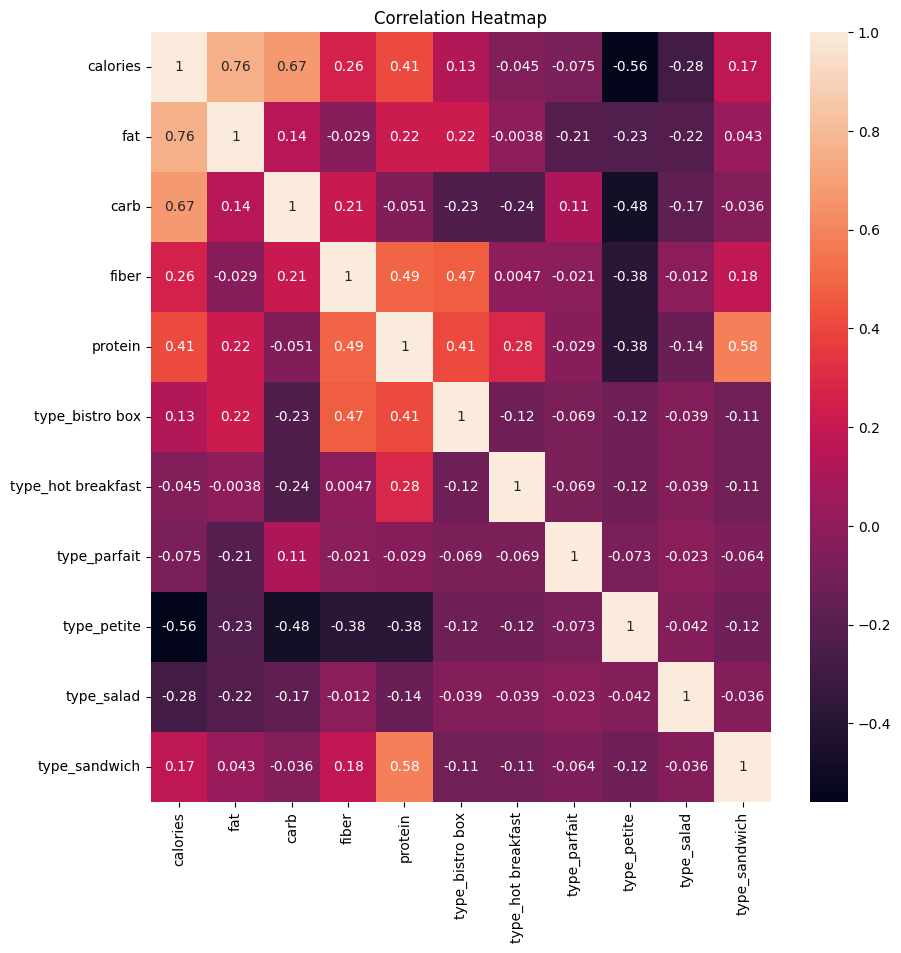

In [65]:
df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation Heatmap');

# **Visualization of Actual And Predicted Values ​In the Test Dataset**

***According to the MLP (Multi-Layer Perceptron) Regressor model***

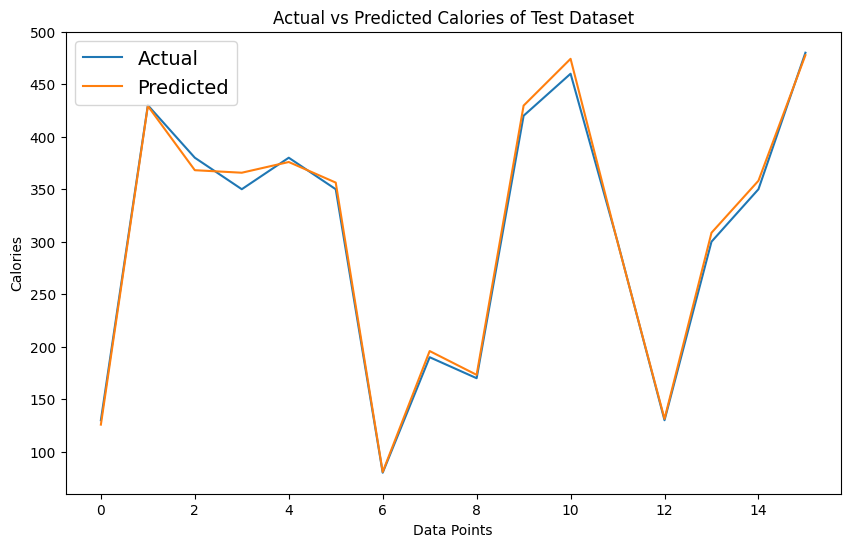

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop=dict(size=14))
plt.title('Actual vs Predicted Calories of Test Dataset')
plt.xlabel('Data Points')
plt.ylabel('Calories')
plt.show()

# **Visualization of Actual And Predicted Values ​In the Full Dataset**

***According to the MLP (Multi-Layer Perceptron) Regressor model***

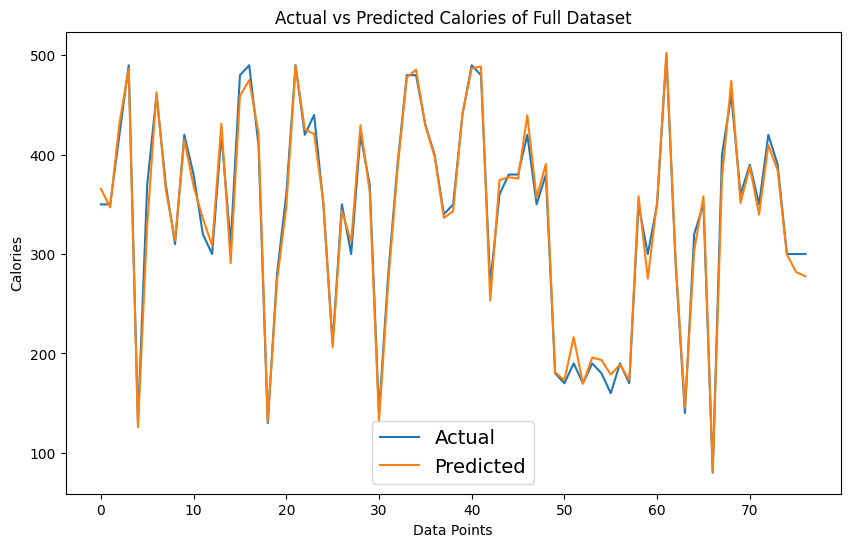

In [67]:
y_pred_all = mlp_model.predict(x)

plt.figure(figsize=(10, 6))
plt.plot(y.values, label='Actual')
plt.plot(y_pred_all, label='Predicted')
plt.legend(prop=dict(size=14))
plt.title('Actual vs Predicted Calories of Full Dataset')
plt.xlabel('Data Points')
plt.ylabel('Calories')
plt.show()